In [ ]:
# ..... homogenize labels ..... #

In [3]:
library(Seurat)
library(dplyr)
library(ggplot2)

In [4]:
# load data
sc1 = readRDS('turtle_integrated_ssSTACAS.rds')
DefaultAssay(sc1) <- 'RNA'
sc1@meta.data[1,]

orig.ident nCount_RNA nFeature_RNA species
stage14_sample4_AAACCCACAATGAACA-1 stage14    3281       1926         turtle 
                                   dataset         consensus_type  
stage14_sample4_AAACCCACAATGAACA-1 stage14_sample4 Endothelial_cell
                                   integrated_snn_res.1 seurat_clusters
stage14_sample4_AAACCCACAATGAACA-1 4                    4

In [5]:
levels(sc1$seurat_clusters)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29"
[31] "30" "31" "32"

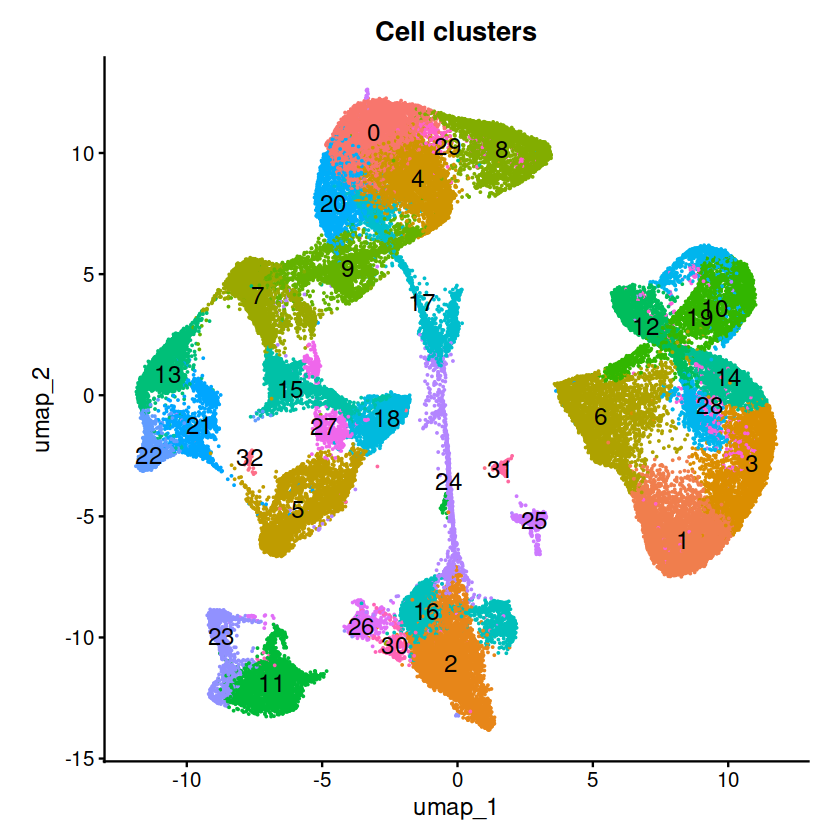

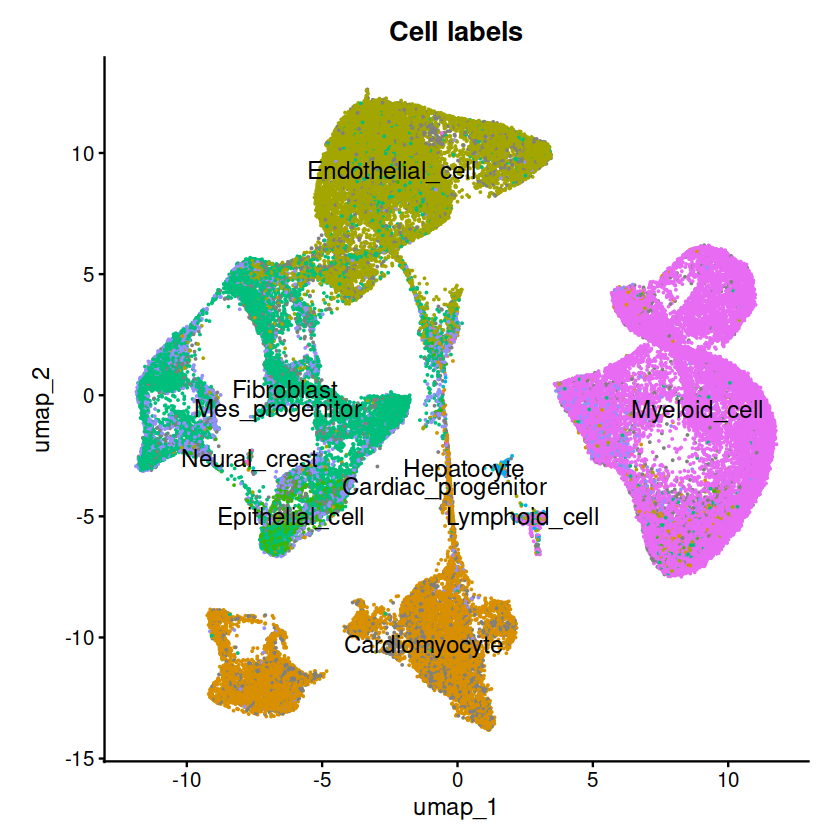

In [6]:
DimPlot(sc1, group.by = 'seurat_clusters', label=T, label.size = 5) + NoLegend() + 
theme(aspect.ratio = 1) + ggtitle("Cell clusters")
DimPlot(sc1, group.by = 'consensus_type', label=T, label.size = 5) + NoLegend() +
theme(aspect.ratio = 1) + ggtitle("Cell labels")

In [7]:
# get markers for each cluster
markers1 <- FindAllMarkers(sc1, only.pos = TRUE)
head(markers1)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32



p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene        
EGFL7        0     2.553921   0.885 0.192 0         0       EGFL7       
LOC122173076 0     3.122182   0.863 0.189 0         0       LOC122173076
LOC101936531 0     2.512832   0.921 0.275 0         0       LOC101936531
RAPGEF5      0     2.700790   0.799 0.166 0         0       RAPGEF5     
KLHL4        0     1.782261   0.864 0.240 0         0       KLHL4       
PLXNA4       0     2.512510   0.849 0.230 0         0       PLXNA4

In [1]:
# load list of orthologs
om = read.delim('mouse_turtle_orthologs_biomart.txt', sep = '\t')
colnames(om) <- c('mouse', 'turtle', 'LCA', 'homology_type', 'orthology_confidence')
om <- om[om[,1]!='' & om[,2]!='' & om$homology_type=='ortholog_one2one',]
dim(om)
om[1,]

ven = read.delim('~/septation/additional_data/DE_genes_RVvsLV.txt', sep = ',')
dim(ven)
ven[1:3,]

[1] 12741     5

mouse  turtle LCA        homology_type    orthology_confidence
11 mt-Nd2 ND2    Vertebrata ortholog_one2one 1

[1] 41  7

Gene               logFC     logCPM   PValue       FDR          upreg_in_RV
1 ENSMUSG00000020427 2.2003493 7.403434 6.622454e-30 1.387404e-26 1          
2 ENSMUSG00000003477 1.3868295 7.032664 7.866222e-14 8.239867e-11 1          
3 ENSMUSG00000033965 0.7028235 7.609180 3.006863e-10 1.574844e-07 1          
  Symbol 
1 IGFBP3 
2 INMT   
3 SLC16A2

In [10]:
rv = ven$Symbol[ven$upreg_in_RV==1]
# rv <- om$turtle[match(rv, om$mouse)]
rv <- rv[!is.na(rv)]

lv = ven$Smybol[ven$upreg_in_RV!=1]
# lv <- om$turtle[match(lv, om$mouse)]
lv <- lv[!is.na(lv)]

In [25]:
# rv vs lv markers?
list1 = markers1$gene[markers1$cluster=='23']
match(rv, list1[1:200])
match(lv, list1[1:200])

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

integer(0)

In [40]:
cls1 = '7'
list1 = markers1$gene[markers1$cluster==cls1]
list1[1:100]
table(sc1$consensus_type[sc1$seurat_clusters==cls1])

[1] "SYNPO2"       "FBN2"         "SOX5"         "AFF2"         "ITGA11"      
  [6] "LTBP1"        "FGFR2"        "ANTXR1"       "GLI3"         "UNC5C"       
 [11] "MECOM"        "FLRT2"        "TRPS1"        "GULP1"        "LOC101949811"
 [16] "ST6GAL2"      "RSPO3"        "CDH11"        "ADAMTS19"     "PLCE1"       
 [21] "PLOD2"        "VCAN"         "COL27A1"      "PDZRN4"       "EBF3"        
 [26] "COL5A1"       "KCNG3"        "LOC101938743" "NLGN1"        "FLI1"        
 [31] "TBX20"        "HMCN1"        "PIEZO2"       "LOC101946364" "CBFB"        
 [36] "FAT4"         "FREM1"        "ADAMTS6"      "TNS3"         "SMAD6"       
 [41] "KHDRBS3"      "THSD4"        "ERG"          "UST"          "THBS2"       
 [46] "PCDH11X"      "LOC101945349" "LAMB1"        "COL12A1"      "HAPLN1"      
 [51] "MXRA5"        "PRKG1"        "NCAM1"        "KLHL4"        "PLCB4"       
 [56] "MEIS1"        "SEMA5A"       "NRP1"         "DCN"          "CACNA2D2"    
 [61] "FILIP1"       "TENM4"        "BTBD11"       "PPP3CA"       "LOC112060969"
 [66] "ARHGAP28"     "SALL3"        "ARHGAP6"      "TMEFF1"       "MYO9A"       
 [71] "XKR4"         "LOC112058807" "FHOD3"        "AUTS2"        "BNC2"        
 [76] "CDK14"        "KIF26A"       "ZBTB20"       "PTPRK"        "EGFR"        
 [81] "TNC"          "CCSER1"       "ANGPTL2"      "PALM2AKAP2"   "FOXP2"       
 [86] "KCNQ2"        "NFATC1"       "MYLK"         "CREB5"        "NFIX"        
 [91] "COL1A1"       "ROBO2"        "MCC"          "PDGFRA"       "LOC112059996"
 [96] "NKD1"         "PTK2"         "LDLRAD4"      "LOC101948668" "PKD1"


   Cardiomyocyte Endothelial_cell  Epithelial_cell       Fibroblast 
               7              216                2             2006 
  Mes_progenitor     Myeloid_cell 
             395                1 

Warning message:
“The following requested variables were not found: MYH7, MYH6, NPPA”


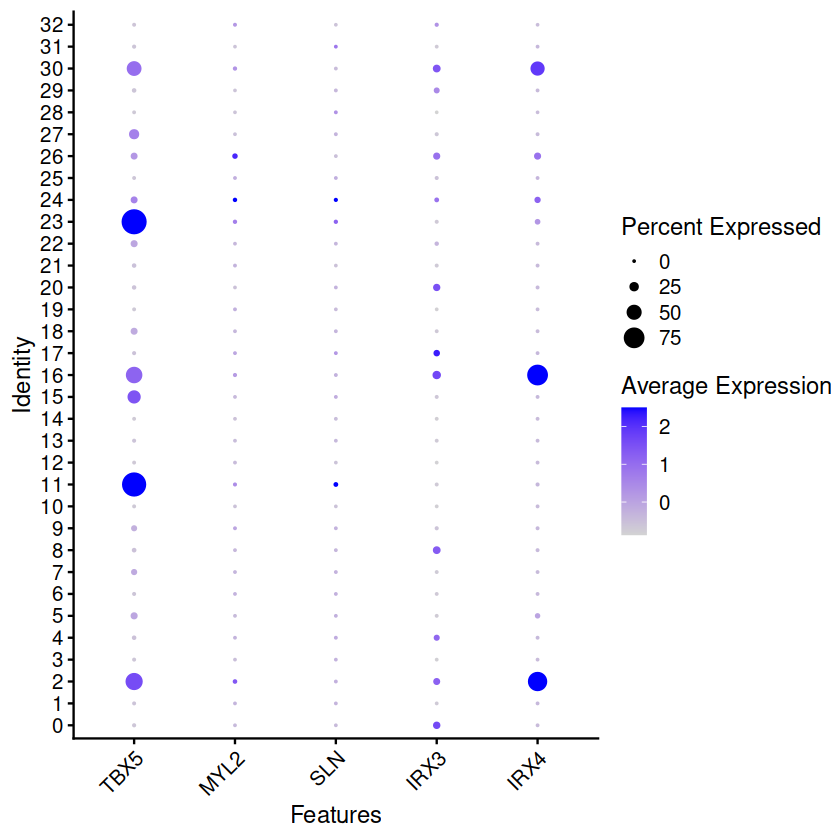

In [12]:
# marker exp - CMs
DotPlot(sc1, features = c('TBX5', 'MYH7', 'MYH6', 'MYL2', 'SLN', 'NPPA', 'IRX3', 'IRX4'), group.by = "seurat_clusters") + RotatedAxis()

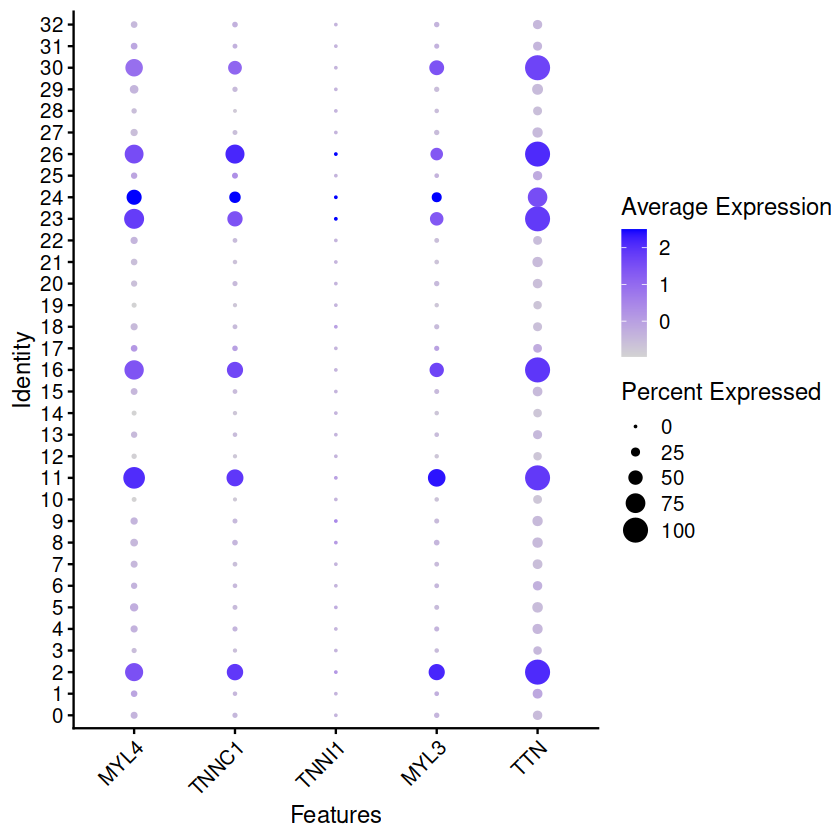

In [13]:
# immature CMs
DotPlot(sc1, features = c('MYL4', 'TNNC1', 'TNNI1', 'MYL3', 'TTN'), group.by = "seurat_clusters") + RotatedAxis()

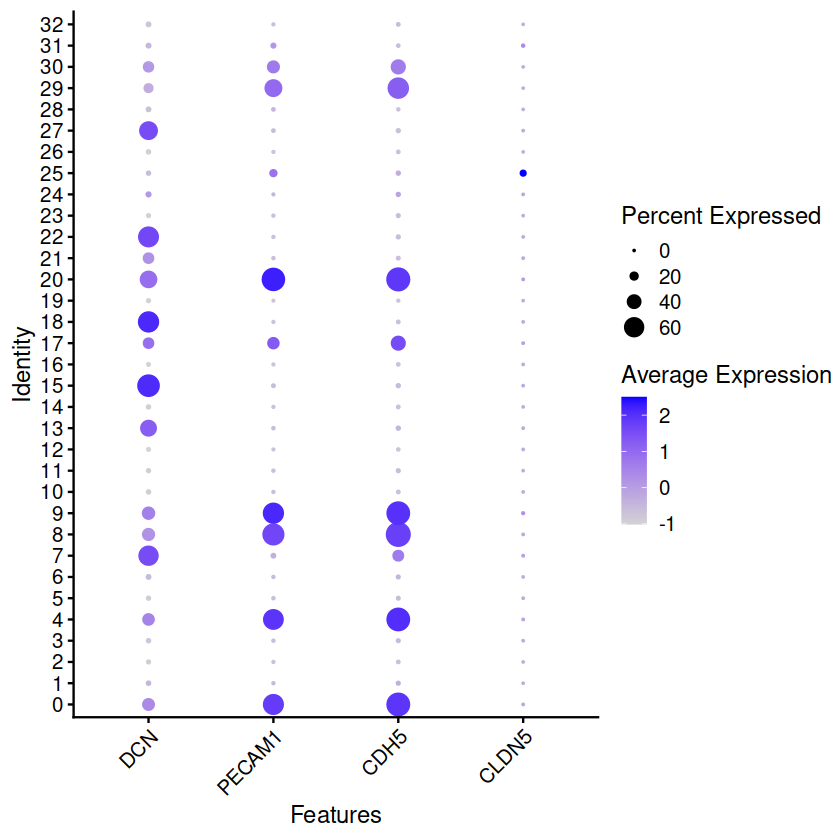

In [14]:
# fibro, endo
DotPlot(sc1, features = c('DCN', 'PECAM1', 'CDH5', 'CLDN5'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: FABP4”


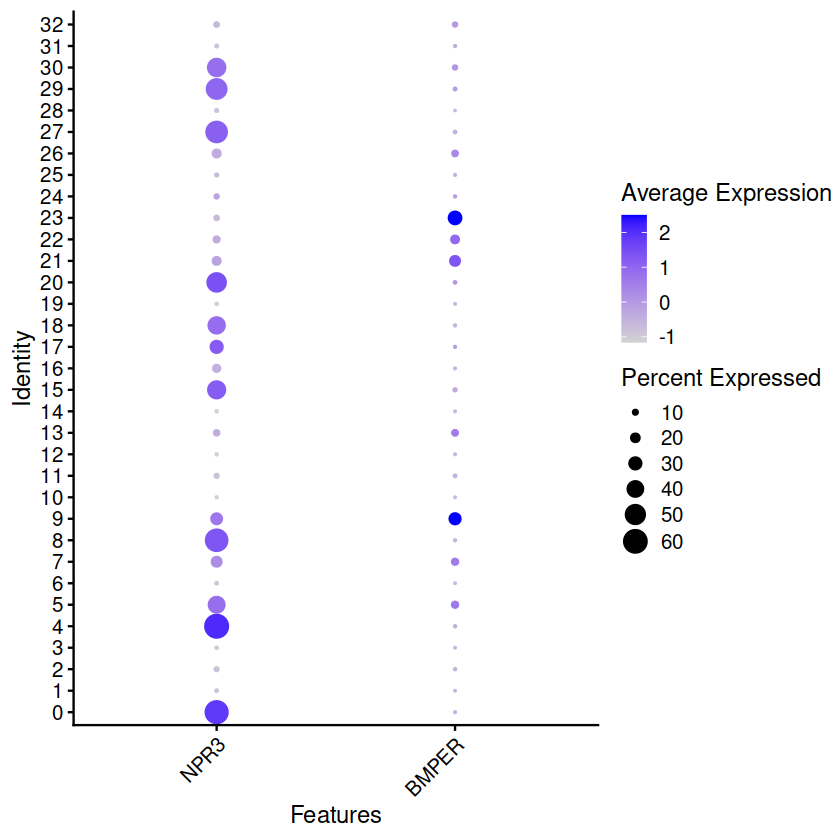

In [15]:
# vascular endothelial vs endocardial
DotPlot(sc1, features = c('FABP4', 'NPR3', 'BMPER'), group.by = "seurat_clusters") + RotatedAxis()

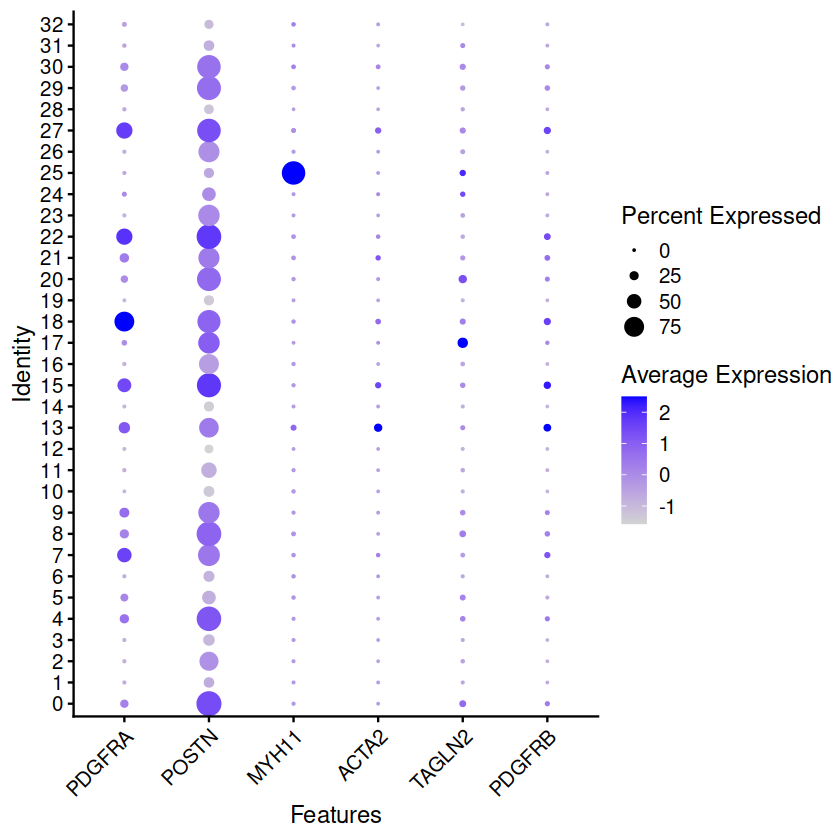

In [16]:
# mural, smc, pericyte
DotPlot(sc1, features = c('PDGFRA', 'POSTN', 'MYH11', 'ACTA2', 'TAGLN2', 'PDGFRB'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: KRT19, WT1”


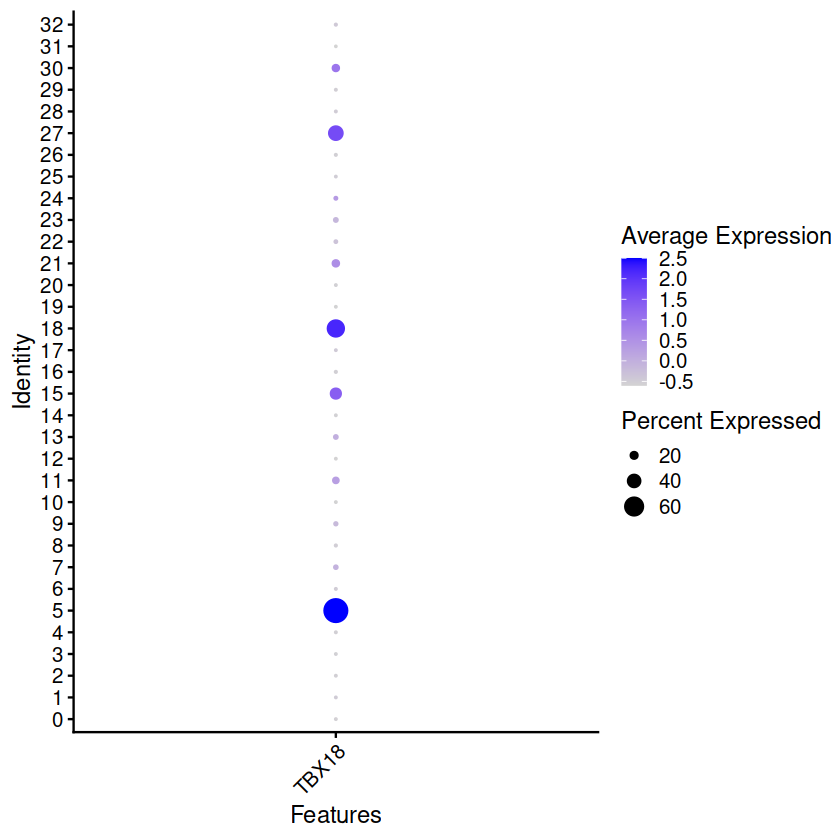

In [17]:
# epicardial
DotPlot(sc1, features = c('KRT19', 'WT1', 'TBX18'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: C1QA, CD41, HBA-A1, CD71”


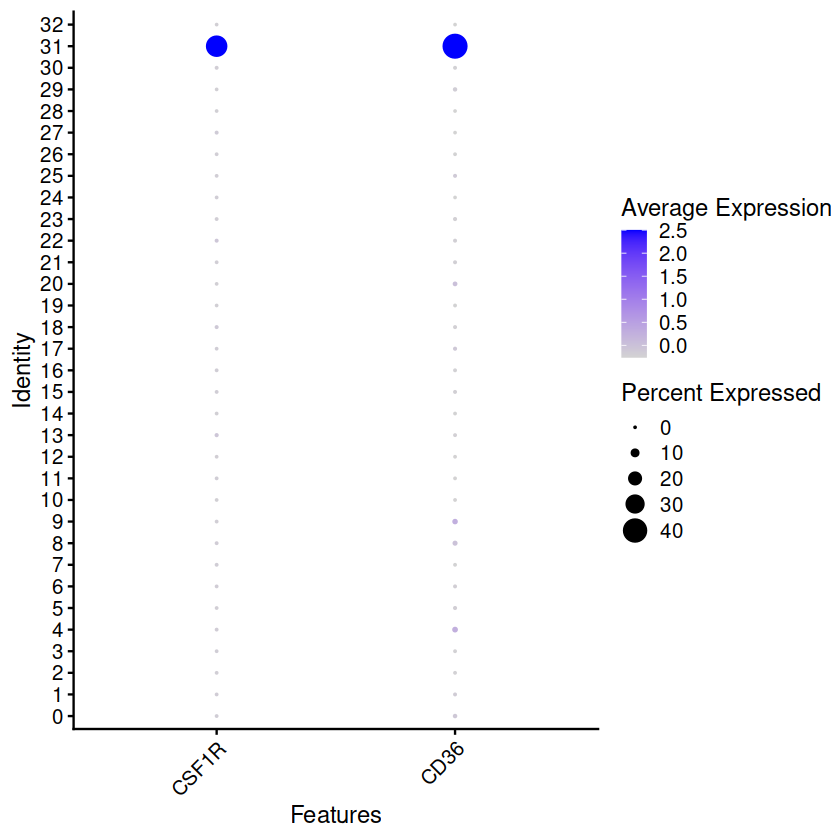

In [18]:
# blood, immune
DotPlot(sc1, features = c('C1QA', 'CSF1R', 'CD41', 'HBA-A1', 'CD36', 'CD71'), group.by = "seurat_clusters") + RotatedAxis()

In [ ]:
# ..... plot marker exp ..... #

In [3]:
# load integrated data
library(viridis)
sc1 = readRDS('turtle_integrated_ssSTACAS.rds')
dim(sc1)
sc1@meta.data[1,]

Loading required package: viridisLite



[1]  3000 76823

orig.ident nCount_RNA nFeature_RNA species
stage14_sample4_AAACCCACAATGAACA-1 stage14    3281       1926         turtle 
                                   dataset         consensus_type  
stage14_sample4_AAACCCACAATGAACA-1 stage14_sample4 Endothelial_cell
                                   integrated_snn_res.1 seurat_clusters
stage14_sample4_AAACCCACAATGAACA-1 0                    0

In [4]:
# get harmonised labels
tab1 = read.delim('turtle_ssSTACAS_celltypes.txt', sep = '\t')
tab1[1,]

sc1$stage = sc1$orig.ident
sc1$broad_type = tab1$subtype[match(sc1$seurat_clusters, tab1$cluster)]
sc1$cluster = tab1$label[match(sc1$seurat_clusters, tab1$cluster)]
sc1$ctypes <- sub('\\_.*', '', sc1$cluster)
sc1@meta.data[1,]

species cluster celltype subtype label cluster_new
1 turtle  12      CM       aCM     aCM_1 c1

orig.ident nCount_RNA nFeature_RNA species
stage14_sample4_AAACCCACAATGAACA-1 stage14    3281       1926         turtle 
                                   dataset         consensus_type  
stage14_sample4_AAACCCACAATGAACA-1 stage14_sample4 Endothelial_cell
                                   integrated_snn_res.1 seurat_clusters stage  
stage14_sample4_AAACCCACAATGAACA-1 0                    0               stage14
                                   broad_type  cluster       ctypes     
stage14_sample4_AAACCCACAATGAACA-1 endocardial endocardial_1 endocardial

In [5]:
# cell type order
ctype_order = c('vCM', 'aCM', 'immature-CM', 'endothelial', 'endocardial', 'epicardial',
                'fibroblast', 'SMC', 'pericyte', 'neural-crest', 'blood', 'macrophage')

DefaultAssay(sc1) <- 'RNA'
sc1$ctypes = factor(sc1$ctypes, levels = rev(ctype_order))
Idents(sc1) <- 'ctypes'

In [6]:
gene_list = c('TBX5', 'ACTN2', 'MYL2', 'IRX4', 'MYL4', 'TNNC1', 
              'PECAM1', 'CDH5', 'NPR3', 'WT1', 'TBX18',
              'DCN', 'POSTN', 'PDGFRA', 'ACTA2', 'PDGFRB',               
              'NRXN1', 'SLC4A1', 'CD24', 'CSF1R')
# DotPlot(sc1, features = gene_list, group.by = "ctypes") #+ coord_flip()

Warning message:
“The following requested variables were not found: WT1, CD24”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


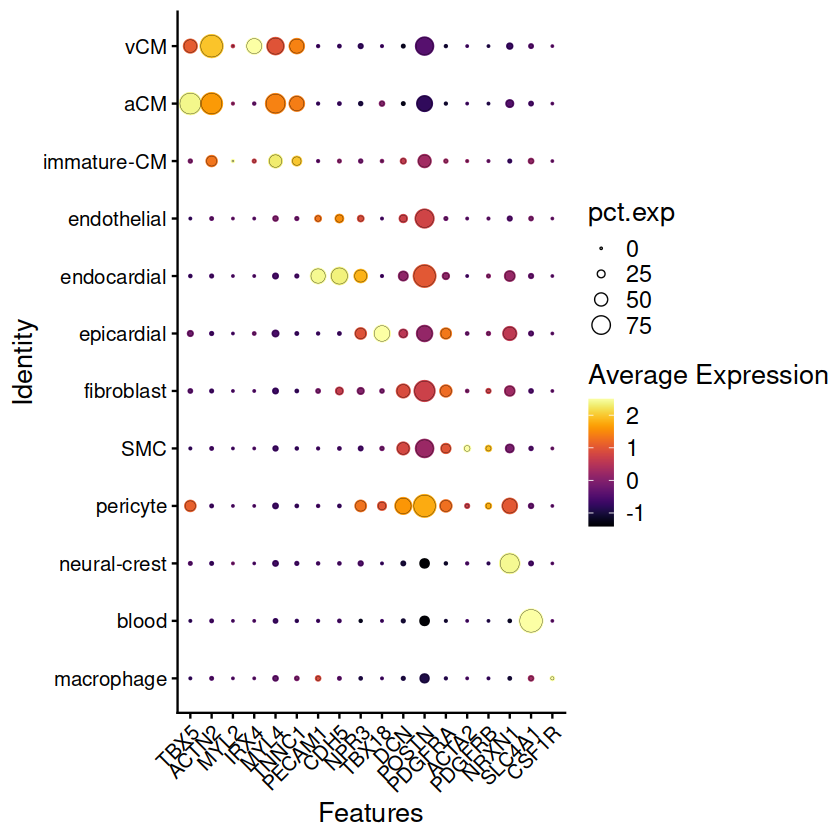

In [8]:
# png('aa-turtle-marker-exp-dotplot.png', width = 11, height = 5, res = 300, units = 'in')
DotPlot(sc1, features = gene_list) +
  geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.1) +
  scale_colour_viridis(option="inferno") +
  guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white"))) +
theme(text = element_text(size = 16), axis.text.x = element_text(angle = 45, hjust = 1)) 
# dev.off()